# 3. Load dataset from DataCube <img align="right" src="image/gistda.png" width="200" height="200">
 - [List product in datacube](#List-product-in-datacube)
 - [List specific product](#List-specific-product)
 - [Load dataset from datacube](#Load-dataset-from-datacube)
 - [Load by specific bands](#Load-by-specific-bands)
 
 <table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://nbviewer.org/github/Pathakorn40/rice-detection/blob/main/Tutorial/Load_data.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
</table>

In [1]:
# import library
import datacube 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Set some configurations for displaying tables nicely
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", None)

### Connect to datacube

In [2]:
#connect to datacube
dc = datacube.Datacube(app = "load_data")

### List product in datacube

In [3]:
# using dc.list_product()
products = dc.list_products()
products

,name,description,license,default_crs,default_resolution
name,,,,,
ls8_collections_sr_scene,ls8_collections_sr_scene,Landsat 8 USGS Collection 1 Higher Level SR scene proessed using LaSRC. 30m UTM based projection.,None,None,None
ls8_sr_ndiff_quarter,ls8_sr_ndiff_quarter,Normalized Difference Index are produced from Landsat 8 Surface Reflectance (EPSG:32647 30m),None,None,None


### List specific product

In [4]:
#List specific product by dc.list_measurements()

product = "ls8_collections_sr_scene"
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,scale_factor
measurement,,,,,,,
coastal_aerosol,coastal_aerosol,int16,reflectance,-9999,[sr_band1],NaN,NaN
blue,blue,int16,reflectance,-9999,[sr_band2],NaN,NaN
green,green,int16,reflectance,-9999,[sr_band3],NaN,NaN
red,red,int16,reflectance,-9999,[sr_band4],NaN,NaN
nir,nir,int16,reflectance,-9999,[sr_band5],NaN,NaN
swir_1,swir_1,int16,reflectance,-9999,[sr_band6],NaN,NaN
swir_2,swir_2,int16,reflectance,-9999,[sr_band7],NaN,NaN
aerosol_qa,aerosol_qa,uint8,bit,0,[sr_aerosol],"{'Fill': {'bits': [0], 'values': {'0': False, '1': True}, 'description': 'Data Fill Flag.'}, 'Cloud': {'bits': [3], 'values': {'0': False, '1': True}, 'description': 'Cloud or Cirrus.'}, 'Water': ...",NaN
radsat_qa,radsat_qa,uint16,bit,0,[toa_refl],"{'Fill': {'bits': [0], 'values': {'0': 'valid data', '1': 'saturated data'}, 'description': 'Data Fill Flag.'}, 'Band 1 Saturation': {'bits': [1], 'values': {'0': 'valid data', '1': 'saturated dat...",NaN


### Load dataset from datacube

In [5]:
# Set parameters for query

# define AOI
lat = 11.800
lon = 99.790

# buffer distance
lon_buffer = 0.05
lat_buffer = 0.05

# date range for analysis
time_range = ("2015-01-01","2015-01-31")

# create bounding box of AOI from buffer
lat_range = (lat-lat_buffer, lat+lat_buffer)
lon_range = (lon-lon_buffer, lon+lon_buffer)


In [6]:
lat_range

(11.75, 11.850000000000001)

In [7]:
lon_range

(99.74000000000001, 99.84)

#### Dispaly Area of interest

In [8]:
from plotimg import display_map
display_map(x= lon_range, y=lat_range)

### Load by query

In [9]:
# set query for load data
query = {
    'y': lat_range,
    'x': lon_range,
    'time': time_range,
    'resolution': (-30, 30),
    'output_crs': 'epsg:4326',
    'group_by':'solar_day'
}

In [10]:
# Loading data using dc.load()
ds = dc.load(product="ls8_collections_sr_scene",**query)
ds

<xarray.Dataset>
Dimensions:          (time: 2, latitude: 1, longitude: 1)
Coordinates:
  * time             (time) datetime64[ns] 2015-01-04T03:38:36 2015-01-20T03:...
  * latitude         (latitude) float64 15.0
  * longitude        (longitude) float64 105.0
    spatial_ref      int32 4326
Data variables:
    coastal_aerosol  (time, latitude, longitude) int16 -9999 -9999
    blue             (time, latitude, longitude) int16 -9999 -9999
    green            (time, latitude, longitude) int16 -9999 -9999
    red              (time, latitude, longitude) int16 -9999 -9999
    nir              (time, latitude, longitude) int16 -9999 -9999
    swir_1           (time, latitude, longitude) int16 -9999 -9999
    swir_2           (time, latitude, longitude) int16 -9999 -9999
    aerosol_qa       (time, latitude, longitude) uint8 0 0
    radsat_qa        (time, latitude, longitude) uint16 0 0
    pixel_qa         (time, latitude, longitude) uint16 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

### Load by specific bands

In [11]:
# set query for load data
query = {
    'y': lat_range,
    'x': lon_range,
    'time': time_range,
    'measurements': ['red', 'green', 'blue', 'nir'],
    'resolution': (-30, 30),
    'output_crs': 'epsg:32647',
    'group_by':'solar_day'
}

In [12]:
# Loading data using dc.load()
ds = dc.load(product="ls8_collections_sr_scene",**query)
ds

<xarray.Dataset>
Dimensions:      (time: 2, y: 371, x: 365)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-04T03:38:36 2015-01-20T03:38:32
  * y            (y) float64 1.31e+06 1.31e+06 1.31e+06 ... 1.299e+06 1.299e+06
  * x            (x) float64 5.806e+05 5.806e+05 ... 5.915e+05 5.915e+05
    spatial_ref  int32 32647
Data variables:
    red          (time, y, x) int16 1377 1312 967 827 762 ... 314 315 315 313
    green        (time, y, x) int16 1105 1073 871 764 706 ... 624 623 619 617
    blue         (time, y, x) int16 739 674 462 391 334 ... 615 608 605 607 611
    nir          (time, y, x) int16 2537 2986 3506 3146 2965 ... 172 179 176 171
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

The output above, There are 2 timesteps of the queried dataset.

### Plot example image of dataset

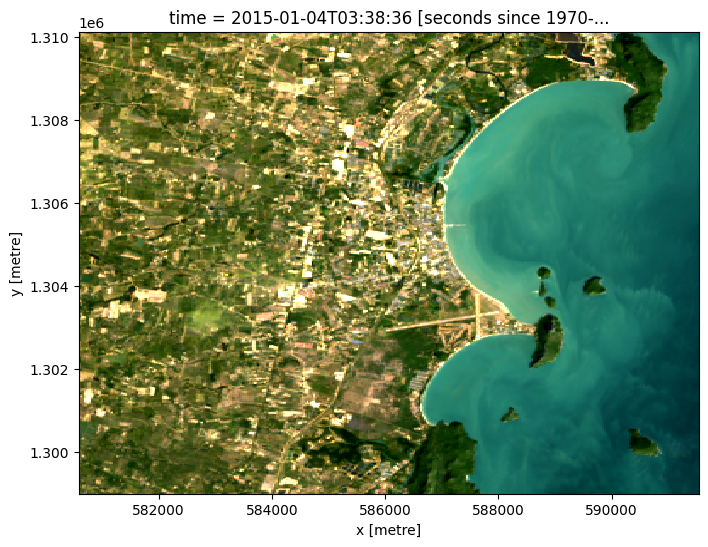

In [13]:
from dream_river.plotimg import rgb

rgb(ds, bands=['red','green', 'blue'], index =0) 

# index = 0 : First timestep.